<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/CNN_for_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Installation and setup


In [68]:
pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [69]:
import tensorflow as tf

In [70]:
print(tf.__version__)

2.12.0


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [72]:
from sklearn import datasets, metrics

In [73]:
cancer = datasets.load_breast_cancer()

In [74]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [75]:
# matrix of features
x = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [76]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [77]:
# dependent variable
y = cancer.target

In [78]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [79]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [80]:
x.shape, y.shape

((569, 30), (569,))

In [81]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train ,y_test = train_test_split(x, y , test_size = 0.2, random_state = 0)

In [82]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [84]:
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [85]:
x_train = x_train.reshape(455,30,1)

In [86]:
x_test = x_test.reshape(114,30,1)

In [87]:
x_train.shape, x_test.shape

((455, 30, 1), (114, 30, 1))

In [108]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

# Step 3: Building the model

In [88]:
model = tf.keras.models.Sequential()

In [89]:
#First CNN layer
model.add(tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, activation = 'relu', input_shape = (30,1)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv1D(filters = 64, kernel_size = 2, activation = 'relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dropout(0.4))


In [90]:
# Adding Flatten layer
model.add(tf.keras.layers.Flatten())

In [91]:
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_6 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_7 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 28, 64)           

In [93]:
 opt = tf.keras.optimizers.Adam(learning_rate = 0.00005)
 model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [94]:
x_train.shape

(455, 30, 1)

# Step 4: Training the Model


In [95]:
history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_test, y_test))

Epoch 1/50
15/15 [==============================] - 3s 37ms/step - loss: 0.7348 - accuracy: 0.6286 - val_loss: 0.6319 - val_accuracy: 0.8596
Epoch 2/50
15/15 [==============================] - 0s 27ms/step - loss: 0.3155 - accuracy: 0.8725 - val_loss: 0.5803 - val_accuracy: 0.8772
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 0.2241 - accuracy: 0.9187 - val_loss: 0.5418 - val_accuracy: 0.8860
Epoch 4/50
15/15 [==============================] - 0s 24ms/step - loss: 0.1783 - accuracy: 0.9407 - val_loss: 0.5078 - val_accuracy: 0.9298
Epoch 5/50
15/15 [==============================] - 0s 34ms/step - loss: 0.1573 - accuracy: 0.9341 - val_loss: 0.4750 - val_accuracy: 0.9561
Epoch 6/50
15/15 [==============================] - 1s 38ms/step - loss: 0.1605 - accuracy: 0.9407 - val_loss: 0.4398 - val_accuracy: 0.9474
Epoch 7/50
15/15 [==============================] - 0s 31ms/step - loss: 0.1490 - accuracy: 0.9385 - val_loss: 0.4090 - val_accuracy: 0.9561
Epoch 8/50
15

# Step 5: Model Prediction

In [114]:
y_pred = model.predict(x_test).round()

4/4 [==============================] - 0s 5ms/step


In [115]:
print(y_pred)

[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]]


In [98]:
print(y_test)

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1]


In [116]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)

In [117]:
print(cm)

[[45  2]
 [ 1 66]]


In [119]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9736842105263158


In [125]:
def learning_curve(history, epoch):
  # training validation accuracy
  epoch_range = range(1, epoch + 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['Train, val'], loc = 'upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(['Train, val'], loc = 'upper left')
  plt.show()

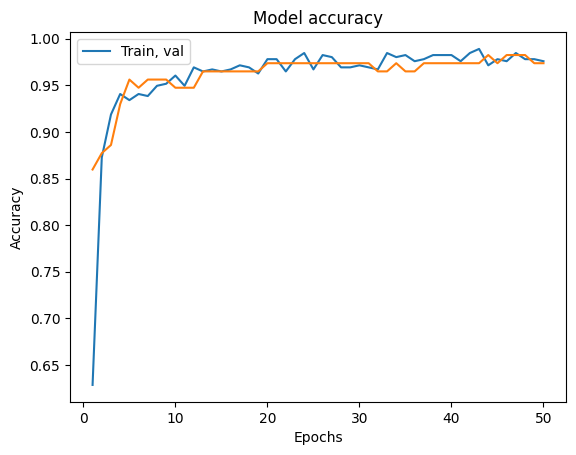

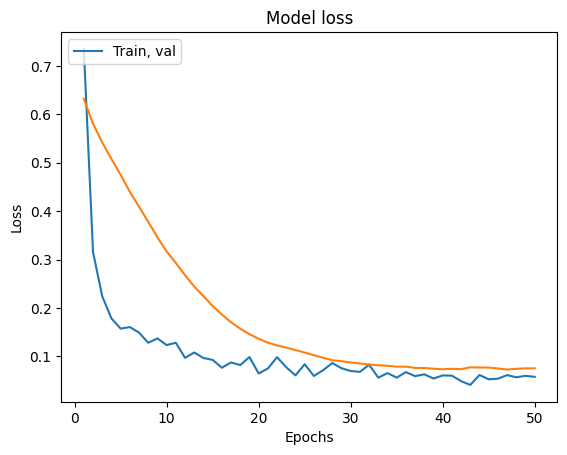

In [126]:
learning_curve(history, 50)